<a href="https://colab.research.google.com/github/ingridmidory/Machine-Learning-with-Python-/blob/main/Regresion_lineal_mtacars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import statistics
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [ ]:
df_ad = pd.read_csv("/content/Titanic.csv") #dataframe_ad
df_ad.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     32 non-null     object
 1   Sex       32 non-null     object
 2   Age       32 non-null     object
 3   Survived  32 non-null     object
 4   Freq      32 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.4+ KB


In [ ]:
col = ['Class', 'Sex', 'Age', 'Survived', 'Freq']
df_ad = df_ad[col]
df_ad

,Class,Sex,Age,Survived,Freq
0,1st,Male,Child,No,0
1,2nd,Male,Child,No,0
2,3rd,Male,Child,No,35
3,Crew,Male,Child,No,0
4,1st,Female,Child,No,0
5,2nd,Female,Child,No,0
6,3rd,Female,Child,No,17
7,Crew,Female,Child,No,0
8,1st,Male,Adult,No,118
9,2nd,Male,Adult,No,154


# Analizyng the data

Scatter plots

<function matplotlib.pyplot.show(close=None, block=None)>

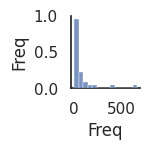

In [ ]:
import seaborn as sns
sns.set(style = 'white', context = 'notebook')
sns.pairplot(df_ad, height = 1.5)
plt.show

Se presentan las graficas de dispersion de puntos



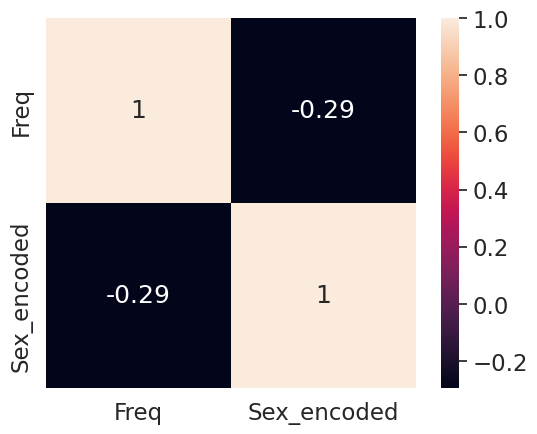

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# Select only the numeric columns (make sure there's more than one)
numeric_df = df_ad.select_dtypes(include=[np.number])

# Check if there are at least two numeric columns
if numeric_df.shape[1] < 1:
    print("Error: Need at least two numeric columns for correlation matrix.")
else:
    cm = np.corrcoef(numeric_df.values.T)
    sns.set(font_scale=1.5)
    sns.heatmap(cm, cbar=True, annot=True, square=True,
                yticklabels=numeric_df.columns,
                xticklabels=numeric_df.columns)

In [ ]:
import numpy as np
import pandas as pd

# Select only the numeric columns
numeric_df = df_ad.select_dtypes(include=[np.number])

# Calculate the correlation matrix on the numeric DataFrame
np.corrcoef(numeric_df.values.T) #matriz de coeficientes de correlacion

1.0

In [ ]:
from sklearn.linear_model import LinearRegression

Definir variables

In [ ]:
x = np.array (df_ad[['Sex']])
y = np.array (df_ad['Survived'])

In [ ]:
x

array([['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female']], dtype=object)

# Getting the Linear Model

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
# Assuming 'df_ad' is your DataFrame
df_ad['Sex_encoded'] = df_ad['Sex'].map({'Male': 0, 'Female': 1}) # Convert 'Sex' to numerical using mapping
x = np.array(df_ad[['Sex_encoded']]) # Use the new encoded column

# Convert 'Survived' column to numerical (assuming 'Yes'/'No' values)
df_ad['Survived_encoded'] = df_ad['Survived'].map({'Yes': 1, 'No': 0})
y = np.array(df_ad['Survived_encoded'])  # Use the new encoded column

lm_fit = LinearRegression() #llamar la clase de regresión lineal
lm_fit.fit(x,y) #entrenar el modelo

LinearRegression()

In [ ]:
print(f" intercept:{lm_fit.intercept_} \n R^2 : {lm_fit.score(x,y)}") #pendiente de la recta e interseccion con el eje x

 intercept:0.5 
 R^2 : 0.0


Hasta aquí no me ha dado el error; para esto usaremos otra libreria para construir otro modelo lineal

In [ ]:
import statsmodels.api as sm #statsmodels es una biblioteca de python que proporciona clases y funciones para la estimacipon de muchos modelos diferentes, asó como para a realización de pruebas estadísticas y la exloración de datos

lm_fit_OLS = sm.OLS(y, x).fit () #model definition
print(lm_fit_OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.250
Model:                            OLS   Adj. R-squared (uncentered):              0.226
Method:                 Least Squares   F-statistic:                              10.33
Date:                Tue, 02 Jul 2024   Prob (F-statistic):                     0.00305
Time:                        21:14:48   Log-Likelihood:                         -29.713
No. Observations:                  32   AIC:                                      61.43
Df Residuals:                      31   BIC:                                      62.89
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
print (f" sex ={lm_fit.intercept_} + {lm_fit.coef_} freq") # Use lm_fit.coef_ to get the coefficients

 sex =0.5 + [0.] freq


Ahora vamos a predecir valores; es decir, poner a pruebas el modelo que ya hicimos:

In [ ]:
# Assuming 'x' has two features as it was used in the original model training
# Replace 'value' with the actual values for the two features
value = 22.8
freq_value = np.array([[value]])
lm_fit.predict(freq_value)

array([0.5])

In [ ]:
# Assuming 'x_original' was the variable used for training the model
df_ad['predicted'] = lm_fit.predict(x)
df_ad

ValueError: X has 1 features, but LinearRegression is expecting 2 features as input.

Agregamos una columna a la tabla llamada "predicted" que me ayuda a predecir los valores. Esto nos ayuda a mantener la informacion en una sola tabla.

In [ ]:
df_ad['residuals']=df_ad['mpg']-df_ad['predicted'] #creando una nueva columna en el dataframe

mse = np.mean(df_ad['residuals']**2)
rmse = np.sqrt(mse)

n= len(df_ad)
p=1
rse = rmse * np.sqrt((n)/(n-p-1))

print(f"MSE: {mse}")

MSE: 248.50112650011403


In [ ]:
def RSE (y_true, y_predicted):

  y_true = np.array(y_true)
  y_predicted = np.array(y_predicted)
  RSS=np.sum(np.square(y_true-y_predicted))

  rse= math.sqrt(RSS/ (len(y_true)-2))

  return rse

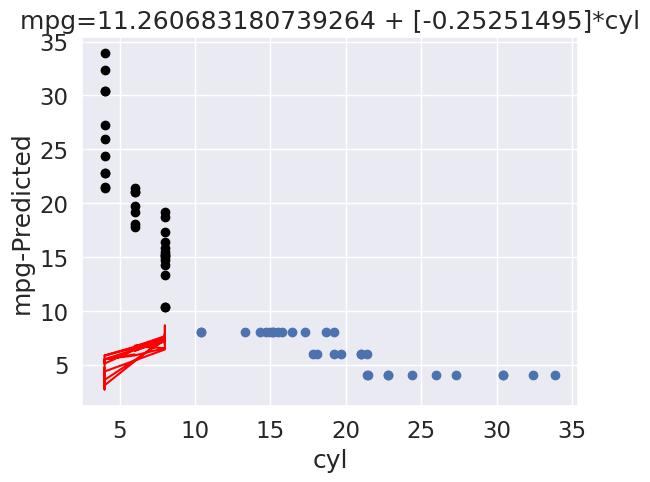

In [ ]:
plt.scatter(df_ad['cyl'], df_ad['mpg'], color='black') #de dispersion
plt.plot(df_ad['cyl'], df_ad['predicted'], color='red') #lineal

plt.title (f"mpg={lm_fit.intercept_} + {lm_fit.coef_}*cyl") #titulo de la grafica
plt.xlabel("cyl")
plt.ylabel("mpg-Predicted")
plt.scatter(x,y)
plt.show()

In [ ]:
yy = df_ad[['cyl', 'mpg']].values  # Select multiple columns and convert to NumPy array
z = df_ad['mpg'].values
lm_fit = LinearRegression()
lm_fit.fit(yy, z)

LinearRegression()

In [ ]:
print(f" intercept:{lm_fit.intercept_} \n R^2 : {lm_fit.score(yy,z)}")

 intercept:0.0 
 R^2 : 1.0


In [ ]:
x = np.array (df_ad[['Sepal.Length']])
y = np.array (df_ad['Sepal.Width'])

In [ ]:
lm_fit = LinearRegression()
lm_fit.fit(x,y)

LinearRegression()

In [ ]:
print(f" intercept:{lm_fit.intercept_} \n R^2 : {lm_fit.score(x,y)}")

 intercept:3.418946836103816 
 R^2 : 0.013822654141080748


In [ ]:
import statsmodels.api as sm

lm_fit_OLS = sm.OLS(y, x).fit ()
print(lm_fit_OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              3277.
Date:                Mon, 01 Jul 2024   Prob (F-statistic):                   2.42e-103
Time:                        23:39:42   Log-Likelihood:                         -146.83
No. Observations:                 150   AIC:                                      295.7
Df Residuals:                     149   BIC:                                      298.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
print (f" Sepal.Length ={lm_fit.intercept_} + {lm_fit.coef_} Sepal.Width")

 Sepal.Length =3.418946836103816 + [-0.0618848] Sepal.Width


In [ ]:
lenght = 4.6
Sepal_lenght= np.array([[lenght]])
lm_fit.predict(Sepal_lenght) #prediccion

array([3.13427677])

In [ ]:
df_ad['predicted'] = lm_fit.predict(x) #creando una nueva columna en el dataframe
df_ad

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,predicted,residuals
0,5.1,3.5,1.4,0.2,setosa,3.103334,2.723435
1,4.9,3.0,1.4,0.2,setosa,3.115711,2.895122
2,4.7,3.2,1.3,0.2,setosa,3.128088,3.066808
3,4.6,3.1,1.5,0.2,setosa,3.134277,3.152652
4,5.0,3.6,1.4,0.2,setosa,3.109523,2.809278
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3.004319,1.349942
146,6.3,2.5,5.0,1.9,virginica,3.029073,1.693316
147,6.5,3.0,5.2,2.0,virginica,3.016696,1.521629
148,6.2,3.4,5.4,2.3,virginica,3.035261,1.779159


In [ ]:
df_ad['residuals']=df_ad['Sepal.Width']-df_ad['predicted'] #creando una nueva columna en el dataframe

mse = np.mean(df_ad['residuals']**2)
rmse = np.sqrt(mse)

n= len(df_ad)
p=1
rse = rmse * np.sqrt((n)/(n-p-1))

print(f"MSE: {mse}")

MSE: 0.18610437589381357


In [ ]:
def RSE (y_true, y_predicted):

  y_true = np.array(y_true)
  y_predicted = np.array(y_predicted)
  RSS=np.sum(np.square(y_true-y_predicted))

  rse= math.sqrt(RSS/ (len(y_true)-2))

  return rse

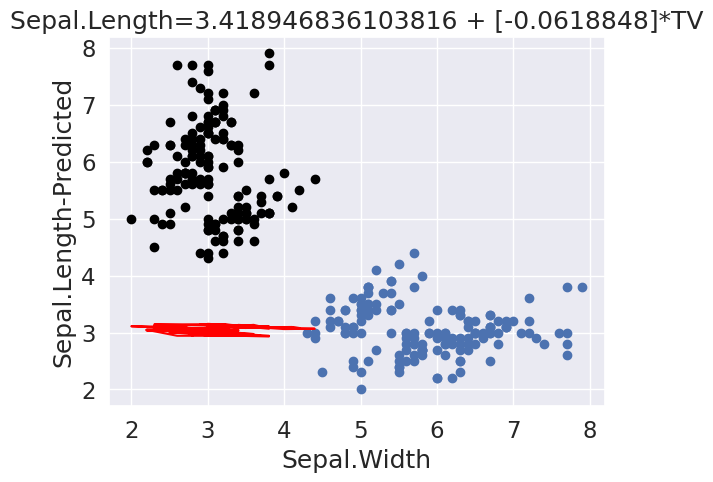

In [ ]:
plt.scatter(df_ad['Sepal.Width'], df_ad['Sepal.Length'], color='black') #de dispersion
plt.plot(df_ad['Sepal.Width'], df_ad['predicted'], color='red') #lineal

plt.title (f"Sepal.Length={lm_fit.intercept_} + {lm_fit.coef_}*TV") #titulo de la grafica
plt.xlabel("Sepal.Width")
plt.ylabel("Sepal.Length-Predicted")
plt.scatter(x,y)
plt.show()